In [ ]:
print(__doc__)

In [22]:
import numpy as np
import matplotlib.pyplot as plt

#Load digits dataset from sklearn libary
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Assign dataset to variable
digits = load_digits()
data = scale(digits.data)

In [23]:
from time import time
from dask.diagnostics import ProgressBar
from dask.multiprocessing import get

ProgressBar().register()

In [35]:
class MultiTrainer():

    
    def __init__(self):
        
        # Set the class model
        self.model = KMeans(init='k-means++',n_clusters=10, random_state=42)

In [37]:
self.model 

NameError: name 'self' is not defined

In [31]:
class MultiTrainer():

    
    def __init__(self):
        
        # Set the class model
        self.model = KMeans(init='k-means++',n_clusters=10, random_state=42)
        #clf = cluster.KMeans(init='k-means++',
        #            n_clusters=10, random_state=42)
        #clf.fit(X_train)
        
    #def load(self, filename):
        
        # Read the partial iris data and convert string labels to numerical vals
        # df = pd.read_csv(filename, header=0, names=['sw','sl','pw','pl','label'])
        #classes = {'Iris-virginica': 0, 'Iris-setosa': 1, 'Iris-versicolor': 2} # numerical categories
        #df['label'] = df.label.map(lambda val: classes.get(val))
        #return df
        
    def print_digits(images,y,max_n=10):
        # Sleep to show multiple processes are indeed executing this function since total time is still ~3s
        time.sleep(3) 
        # set up the figure size in inches
        fig = plt.figure(figsize = (12, 12))
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace =0.05, wspace=0.05)
        i = 0
        # split received dataframe into testing and training and return in dict
        #xTrain, xTest, yTrain, yTest = train_test_split(df.ix[:,['sw','sl','pw','pl']], 
        #                                                df.ix[:,'label'])
        X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, 
                                                                                       test_size=.25, random_state=42)
        n_samples, n_features = X_train.shape
        n_digits = len(np.unique(y_train))
        labels = y_train
        while i <max_n and i <images.shape[0]:
            # plot the images in a matrix of 20x20
            p = fig.add_subplot(20, 20, i + 1, xticks=[],yticks=[])
            p.imshow(images[i], cmap =plt.cm.bone)
            #label the image with the target value
            p.text(0, 14, str(y[i]))
            i = i + 1
        #print_digits(digits.images, digits.target, max_n=10)
        #plt.show()  

       
        return {'xTrainData':X_train, 'yTrainData':y_train, 
               'xTestData':X_test, 'yTestData':y_test}
          
    def trainer(self, datadict):
        
        for data in datadict:

            X_train, y_train = data.get('xTrainData'), data.get('yTrainData')
            X_test, y_test = data.get('xTestData'), data.get('yTestData')

            self.model.partial_fit(X_train.values, y_train.values)

        return self.model, X_test, y_test


In [ ]:
# Create object of class above
mt = MultiTrainer()


# Task graph for schedulers
dsk = {'load1': (mt.load, 'iris1.data'),
       'load2': (mt.load, 'iris2.data'),
       'load3': (mt.load, 'iris3.data'),
       'load4': (mt.load, 'iris4.data'),
       'load5': (mt.load, 'iris5.data'),
       'load6': (mt.load, 'iris6.data'),
       'split1': (mt.splitter, 'load1'),
       'split2': (mt.splitter, 'load2'),
       'split3': (mt.splitter, 'load3'),
       'split4': (mt.splitter, 'load4'),
       'split5': (mt.splitter, 'load5'),
       'split6': (mt.splitter, 'load6'),
       'train': (mt.trainer, ['split{}'.format(i) for i in range(1,7)])
      }



startTime = time.time()

# Begin the parallel loading and training
model, X_test, y_test = get(dsk, 'train')

# Score and print results
score = accuracy_score(y_test, model.predict(X_test))

print('Model has accuracy of {}%'.format(round(score * 100, 0)))
print('Time taken: {} seconds'.format(round(time.time() - startTime)))

In [10]:
y_pred=clf.predict(X_test)
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number]
    print_digits(images, y_pred, max_n=10)
    
for i in range(10):
        print_cluster(images_test, y_pred, i)
        
#plt.savefig('K_means_Cluster')

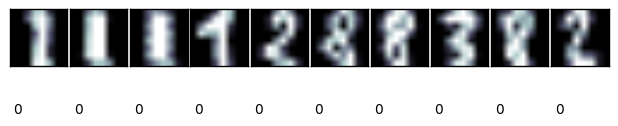

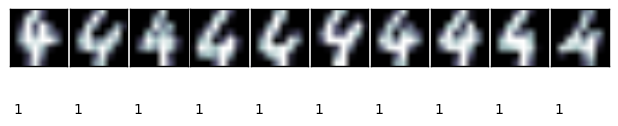

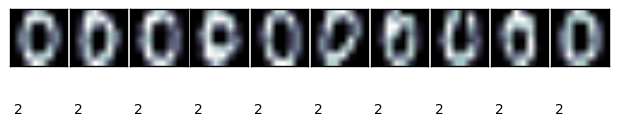

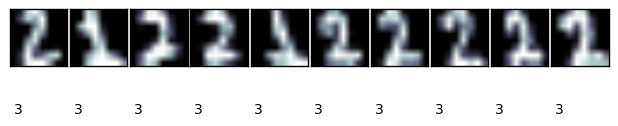

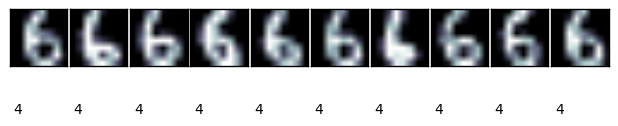

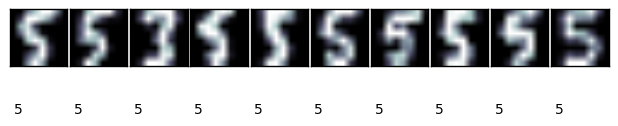

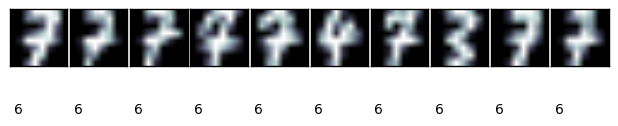

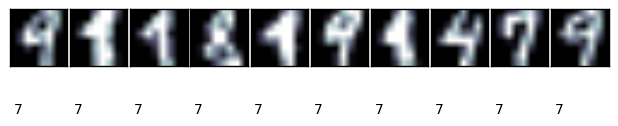

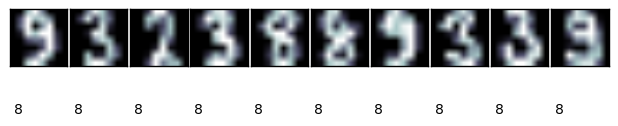

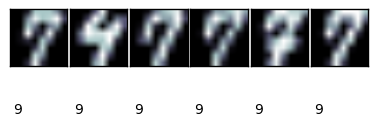

In [11]:
#This shows ten images from each cluster. Some clusters are very clear
plt.show()

In [12]:
from sklearn import metrics
print("Adjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test,y_pred))
)

Adjusted rand score:0.57


In [13]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


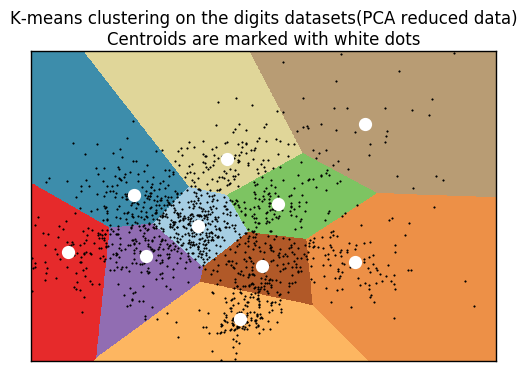

In [14]:
# Show k-means graphically on a two-dimensional plane

from sklearn import decomposition
PCA = decomposition.PCA(n_components=2).fit(X_train)
reduced_X_train = PCA.transform(X_train)

# step size of the mesh
h = 0.01
# point in the mesh [x_min, m_max]x[y_min, y_max].

x_min, x_max = reduced_X_train[:,0].min() + 1, reduced_X_train[:,0].max() - 1
y_min, y_max = reduced_X_train[:,1].min() + 1, reduced_X_train[:,1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
    np.arange(y_min, y_max, h))
kmeans = cluster.KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_X_train)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
                     
# Put the result into a color plot
                     
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation = 'nearest', extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap=plt.cm.Paired, aspect = 'auto', origin='lower')
plt.plot(reduced_X_train[:,0], reduced_X_train[:,1],'k.', markersize=2)
                     
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker = '.',s=169, linewidth=3, color='w', zorder=10)
plt.title('K-means clustering on the digits datasets(PCA reduced data)\nCentroids are marked with white dots')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [15]:
aff = cluster.AffinityPropagation()
aff.fit(X_train)
print (aff.cluster_centers_indices_.shape)

(112,)


In [16]:
ms = cluster.MeanShift()
ms.fit(X_train)
print(ms.cluster_centers_.shape)

(18, 64)


In [18]:
from sklearn import mixture
# Fit a Gaussian mixture with EM using five components
#gm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(X)
gm = mixture.GaussianMixture(n_components=n_digits, covariance_type='tied', random_state=42)
gm.fit(X_train)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [19]:
#Print train clustering and confusion matrix
y_pred = gm.predict(X_test)
print("Adjusted rand score: {:.2}".format(metrics.adjusted_rand_score(y_test,y_pred)))

Adjusted rand score: 0.46


In [20]:
print("Homogeneity score:{:.2}".format(metrics.homogeneity_score(y_test, y_pred)))

Homogeneity score:0.62


In [21]:
print("Completeness Score:{:.2}".format(metrics.completeness_score(y_test, y_pred)))

Completeness Score:0.68
